QAStrategyCTABase

http://www.yutiansut.com:3000/topic/5dd3d33b0c8e672840f3feed

In [1]:
import QUANTAXIS as QA

jqdatasdk not installed


Video example

In [4]:
import pandas as pd

In [13]:
def strategy001(data,N=40,mu=1):
    MP = QA.MA((data.high+data.low+data.close)/3,N)
    TR = pd.concat([abs(data.high-data.low),abs(data.high-data.close.shift(1)),abs(data.low-data.close.shift(1))],axis=1).max(axis=1)
    upBand = MP+mu*QA.MA(TR,N)
    dnBand = MP + mu*QA.MA(TR,N)
    FP = MP
    return pd.DataFrame({'MP':MP,'TR':TR,'upBand':upBand,'dnBand':dnBand})

In [19]:
def EMAs(data,n1=20,n2=40,n3=60,n4=80):
    ema1 = QA.EMA(data.close,n1)
    ema2 = QA.EMA(data.close,n2)
    ema3 = QA.EMA(data.close,n3)
    ema4 = QA.EMA(data.close,n4)
    return pd.DataFrame({'ema1':ema1,'ema2':ema2,'ema3':ema3,'ema4':ema4})

In [14]:
data = QA.QA_fetch_stock_day_adv('000001','2020-06-01','2020-12-31')

In [15]:
ind = data.add_func(strategy001)

d:\ProgramData\Anaconda3\lib\site-packages\QUANTAXIS\QAData\base_datastruct.py:841: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  return self.data.groupby(


In [16]:
xs = QA.QA_DataStruct_Indicators(ind)

In [17]:
xs.get_timerange?

In [18]:
print(ind.tail())

                          MP    TR     upBand     dnBand
date       code                                         
2020-12-25 000001  18.563000  0.46  19.202000  19.202000
2020-12-28 000001  18.585167  0.90  19.228667  19.228667
2020-12-29 000001  18.611583  0.60  19.252333  19.252333
2020-12-30 000001  18.631250  0.48  19.271000  19.271000
2020-12-31 000001  18.666250  0.56  19.296000  19.296000


In [2]:
import QAStrategy
from QAStrategy.qactabase import QAStrategyCTABase

In [3]:
class x(QAStrategyCTABase):
    def on_bar(self, data):
        
        print(data)

Create new Account

In [10]:
account = x(code= 'rb2005',frequence='1min', strategy_id='testfordebug4')

In [5]:
account.send_order('BUY','OPEN',3350, 1)

AttributeError: 'x' object has no attribute 'running_mode'

In [10]:
dir(QAStrategyCTABase)

['BarsSinceEntryLong',
 'BarsSinceEntryShort',
 'EntryPriceLong',
 'EntryPriceShort',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_debug_sim',
 '_on_1min_bar',
 'add_subscriber',
 'bar_id',
 'callback',
 'check_order',
 'control_status',
 'daily_func',
 'debug',
 'debug_currenttick',
 'debug_histick',
 'debug_sim',
 'debug_t0',
 'force_close',
 'get_cash',
 'get_code',
 'get_code_marketdata',
 'get_current_marketdata',
 'get_exchange',
 'get_positions',
 'ind2str',
 'load_strategy',
 'market_data',
 'market_datetime',
 'old_data',
 'on_15min_bar',
 'on_1min_bar',
 'on_30min_bar',
 'on_5min_bar',
 'on_bar',
 'on_dailyclose',
 'on_dailyopen',
 'on_deal',
 'on_ordere

In [17]:
from QAStrategy.qastockbase import QAStrategyStockBase

In [19]:
#example
import random
class strategy(QAStrategyStockBase):
    def on_bar(self, data):
        print(data)

        
        code = data.name[1]
        pos = self.get_positions(code)
        print('---------------under is 当前全市场的market_data --------------')
        
        print(self.get_current_marketdata())
        print('---------------under is 当前品种的market_data --------------')
        print(self.get_code_marketdata(code))
        print(code)
        
        
        
        if random.random() > 0.5:
            self.send_order('BUY', 'OPEN', code, price=data['close'], volume=1000)
        else:
            if pos.volume_long > 0:
                self.send_order('SELL', 'CLOSE', code, price=data['close'], volume=pos.volume_long)
            
        print('---------------under is 账户情况和持仓情况 -------------------')
        print(self.get_positions(code).message)
        print(self.acc.history_table)
            
        #print(self.running_time)
        input()

In [6]:
#example 
from QAStrategy import QAStrategyCTABase
import QUANTAXIS as QA

class CCI(QAStrategyCTABase):
    def on_bar(self, bar):
        """你的大部分策略逻辑都是在此写的
        """
        res = self.cci()  
        print(res.iloc[-1])
        if res.CCI[-1] < -100:
            print('LONG')
            if self.positions.volume_long == 0:
                self.send_order('BUY', 'OPEN', price=bar['close'], volume=1)
            if self.positions.volume_short > 0:
                self.send_order('BUY', 'CLOSE', price=bar['close'], volume=1)

        elif res.CCI[-1] > 100:
            print('SHORT')
            if self.positions.volume_short == 0:
                self.send_order('SELL', 'OPEN', price=bar['close'], volume=1)
            if self.positions.volume_long > 0:
                self.send_order('SELL', 'CLOSE', price=bar['close'], volume=1)

    def cci(self,):
        """你可以自定义你想要的函数
        """
        return QA.QA_indicator_CCI(self.market_data, 61)


strategy = CCI(code='rb2005', frequence='1min',
                strategy_id='a3916de0-bd28-4b9c-bea1-94d91f1744ac')
strategy.run_backtest()

QUANTAXIS>> QA something wrong with date


QAACCPRO: reload from DATABASE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
{}
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
< QA_AccountPRO a3916de0-bd28-4b9c-bea1-94d91f1744ac market: future_cn>
future_cn
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE
QA Error QA_fetch_future_day_adv parameter code=[] start=None end=None call QA_fetch_future_day return None
QAACCOUNT: THIS ACCOUNT DOESNOT HAVE ANY TRADE


ValueError: min() arg is an empty sequence

In [21]:
# coding:utf-8
#
# The MIT License (MIT)
#
# Copyright (c) 2018-2020 azai/Rgveda/GolemQuant
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.  IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
"""
基于 QUANTAXIS 的 DataStruct.add_func 使用，也可以单独使用处理 Kline数据，基于RSRS择时，
RSRS(阻力支撑相对强度)择时策略研究，
聚宽： https://www.joinquant.com/view/community/detail/df07581179e8a3c73e46978cb52d7448?type=best
"""

import pandas as pd
import os
import datetime
import numpy as np 
import statsmodels.formula.api as sml

import matplotlib.pyplot as plt
import scipy.stats as scs
import matplotlib.mlab as mlab

#import statsmodels.api as sm
#from pandas.stats.api import ols
try:
    import QUANTAXIS as QA
    from QUANTAXIS.QAIndicator.talib_numpy import *
except:
    print('PLEASE run "pip install QUANTAXIS" to call these modules')
    pass

import statsmodels.api as sm

In [22]:
def pre_rsrs_data_func(data, N=18, M=252):
    """
    准备数据
    """
    highs = data.high.values
    lows = data.low.values
    start_t = datetime.datetime.now()
    print(start_t)

    # 斜率
    data['beta'] = 0
    data['R2'] = 0
    beta_rsquared = np.zeros((len(data), 2),)

    for i in range(len(highs))[N:]:
        data_high = highs[i - N:i]
        data_low = lows[i - N:i]
        X = sm.add_constant(data_low)
        model = sm.OLS(data_high,X)
        results = model.fit()

        # beta = low
        if (len(results.params) > 1):
            beta_rsquared[i, 0] = results.params[1]
        else:
            beta_rsquared[i, 0] = results.params[0]
        beta_rsquared[i, 1] = results.rsquared

    data[['beta', 'R2']] = beta_rsquared

    # 日收益率
    data['ret'] = data.close.pct_change(1)
    
    # 标准分
    data['beta_norm'] = data['beta'].rolling(M).apply(lambda x:scs.zscore(x.values)[-1])

    beta = data.columns.get_loc('beta')
    beta_norm = data.columns.get_loc('beta_norm')
    data.iloc[:min(M, len(highs)), beta_norm] = scs.zscore(data.iloc[:min(M, len(highs)), beta].values)
    data['RSRS_R2'] = data.beta_norm * data.R2
    data = data.fillna(0)
    
    # 右偏标准分
    data['beta_right'] = data.RSRS_R2 * data.beta

    end_t = datetime.datetime.now()
    print(end_t, 'spent:{}'.format((end_t - start_t)))
    return data

In [23]:
def pre_rsrs_data_v1_func(data, N=18, M=252):
    """
    准备数据
    """
    highs = data.high
    start_t = datetime.datetime.now()
    print(start_t)

    # 斜率
    data['beta'] = 0
    data['R2'] = 0
    beta_rsquared = np.zeros((len(data), 2),)

    for i in range(N - 1, len(highs) - 1):
    #for i in range(len(highs))[N:]:
        df_ne = data.iloc[i - N + 1:i + 1, :]
        model = sml.ols(formula='high~low', data = df_ne)
        result = model.fit()

        # beta = low
        beta_rsquared[i + 1, 0] = result.params[1]
        beta_rsquared[i + 1, 1] = result.rsquared

    data[['beta', 'R2']] = beta_rsquared

    # 日收益率
    data['ret'] = data.close.pct_change(1)
    
    # 标准分
    data['beta_norm'] = (data['beta'] - data.beta.rolling(M).mean().shift(1)) / data.beta.rolling(M).std().shift(1)

    beta_norm = data.columns.get_loc('beta_norm')
    beta = data.columns.get_loc('beta')
    for i in range(min(M, len(highs))):
        data.iat[i, beta_norm] = (data.iat[i, beta] - data.iloc[:i - 1, beta].mean()) / data.iloc[:i - 1, beta].std() if (data.iloc[:i - 1, beta].std() != 0) else np.nan

    data.iat[2, beta_norm] = 0
    data['RSRS_R2'] = data.beta_norm * data.R2
    data = data.fillna(0)
    
    # 右偏标准分
    data['beta_right'] = data.RSRS_R2 * data.beta
    end_t = datetime.datetime.now()
    print(end_t, 'spent:{}'.format((end_t - start_t)))
    return data

In [24]:
def pre_rsrs_data_v2_func(data, N=18, M=252):
    """
    准备数据
    """
    highs = data.high

    # 斜率
    data['beta'] = 0
    data['R2'] = 0
    beta_rsquared = np.zeros((len(data), 2),)

    for i in range(N - 1, len(highs) - 1):
    #for i in range(len(highs))[N:]:
        df_ne = data.iloc[i - N + 1:i + 1, :]
        model = sml.ols(formula='high~low',data = df_ne)
        result = model.fit()

        # beta = low
        beta_rsquared[i + 1, 0] = result.params[1]
        beta_rsquared[i + 1, 1] = result.rsquared

    data[['beta', 'R2']] = beta_rsquared

    # 日收益率
    data['ret'] = data.close.pct_change(1)
    
    # 标准分
    #data['beta_norm'] = (data['beta'] - data.beta.rolling(M).mean().shift(1))
    #/ data.beta.rolling(M).std().shift(1)
    data['beta_norm'] = data['beta'].rolling(M).apply(lambda x:scs.zscore(x.values)[-1])

    beta = data.columns.get_loc('beta')
    beta_norm = data.columns.get_loc('beta_norm')
    data.iloc[:min(M, len(highs)), beta_norm] = scs.zscore(data.iloc[:min(M, len(highs)), beta].values)
    #beta_norm = data.columns.get_loc('beta_norm')
    #beta = data.columns.get_loc('beta')
    #for i in range(min(M, len(highs))):
    # data.iat[i, beta_norm] = (data.iat[i, beta] - data.iloc[:i - 1,
    # beta].mean()) / data.iloc[:i - 1, beta].std() if (data.iloc[:i - 1,
    # beta].std() != 0) else np.nan

    #data.iat[2, beta_norm] = 0
    data['RSRS_R2'] = data.beta_norm * data.R2
    data = data.fillna(0)
    
    # 右偏标准分
    data['beta_right'] = data.RSRS_R2 * data.beta

    return data

In [25]:
def RSRS1(price, S1=1.0, S2=0.8):
    """
    斜率指标交易策略标准分策略
    """
    data = price.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记

    beta = data.columns.get_loc('beta')
    flag = data.columns.get_loc('flag')
    position_col = data.columns.get_loc('position')

    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0] - 1):
        # 开仓
        if data.iat[i, beta] > S1 and position == 0:
            data.iat[i, flag] = 1
            data.iat[i + 1, position_col] = 1
            position = 1

        # 平仓
        elif data.iat[i, beta] < S2 and position == 1: 
            data.iat[i, flag] = -1
            data.iat[i + 1, position_col] = 0     
            position = 0
        
        # 保持
        else:
            data.iat[i + 1, position_col] = data.iat[i, position_col]
        
    data['nav'] = (1 + data.close.pct_change(1).fillna(0) * data.position).cumprod() 
        
    return(data)

In [26]:
def RSRS2(price,
          S=0.7):
    """
    标准分策略
    """
    data = price.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记

    beta_norm = data.columns.get_loc('beta_norm')
    flag = data.columns.get_loc('flag')
    position_col = data.columns.get_loc('position')

    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0] - 1):
        # 开仓
        if data.iat[i, beta_norm] > S and position == 0:
            data.iat[i, flag] = 1
            data.iat[i + 1, position_col] = 1
            position = 1
        # 平仓
        elif data.iat[i, beta_norm] < -S and position == 1: 
            data.iat[i, flag] = -1
            data.iat[i + 1, position_col] = 0     
            position = 0
        
        # 保持
        else:
            data.iat[i + 1, position_col] = data.iat[i, position_col]
        
    data['nav'] = (1 + data.close.pct_change(1).fillna(0) * data.position).cumprod() 
           
    return(data)

In [27]:
def RSRS3(HS300,S=0.7):
    """
    修正标准分策略
    """
    data = HS300.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记

    RSRS_R2 = data.columns.get_loc('RSRS_R2')
    flag = data.columns.get_loc('flag')
    position_col = data.columns.get_loc('position')

    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0] - 1):
        # 开仓
        if data.iat[i, RSRS_R2] > S and position == 0:
            data.iat[i, flag] = 1
            data.iat[i + 1, position_col] = 1
            position = 1
        # 平仓
        elif data.iat[i, RSRS_R2] < -S and position == 1: 
            data.iat[i, flag] = -1
            data.iat[i + 1, position_col] = 0      
            position = 0
        # 保持
        else:
            data.iat[i + 1, position_col] = data.iat[i, position_col]
        
    data['nav'] = (1 + data.close.pct_change(1).fillna(0) * data.position).cumprod() 
           
    return(data)


In [28]:
def RSRS4(price,
          S=0.7):
    """
    #右偏标准分策略
    """
    data = price.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记

    beta_right = data.columns.get_loc('beta_right')
    flag = data.columns.get_loc('flag')
    position_col = data.columns.get_loc('position')

    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0] - 1):
        
        # 开仓
        if data.iat[i, beta_right] > S and position == 0:
            data.iat[i, flag] = 1
            data.iat[i + 1, position_col] = 1
            position = 1
        # 平仓
        elif data.iat[i, beta_right] < -S and position == 1: 
            data.iat[i, flag] = -1
            data.iat[i + 1, position_col] = 0     
            position = 0
        
        # 保持
        else:
            data.iat[i + 1, position_col] = data.iat[i, position_col]     
        
    data['nav'] = (1 + data.close.pct_change(1).fillna(0) * data.position).cumprod() 
           
    return(data)

In [ ]:
# if __name__ == '__main__':

In [29]:
codelist = ['512690', '510900', '513100', '510300', 
                '512980', '512170', '515000', '512800',
                '159941', '159994', '515050', '159920',
                '159952', '159987', '159805', '159997',
                '159919',]

In [30]:
codelist = ['510300']

In [31]:
# 获取ETF/股票中文名称，只是为了看得方便，交易策略并不需要ETF/股票中文名称
#stock_names = QA.QA_fetch_etf_name(codelist)
#codename = [stock_names.at[code, 'name'] for code in codelist]

## 读取 ETF基金 日线，存在index_day中
#data_day = QA.QA_fetch_index_day_adv(codelist,
#    start='2010-01-01',
#    end='{}'.format(datetime.date.today()))

codelist = ['600519']
#codelist = ['600239']
#codelist = ['600338']
#codelist = ['000671']

In [32]:
# 获取股票中文名称，只是为了看得方便，交易策略并不需要股票中文名称
stock_names = QA.QA_fetch_stock_name(codelist)
codename = [stock_names.at[code, 'name'] for code in codelist]

data_day = QA.QA_fetch_stock_day_adv(codelist,
                                    '2008-01-01',
                                    '{}'.format(datetime.date.today(),)).to_qfq()

In [33]:
indices_rsrsT = data_day.add_func(pre_rsrs_data_v1_func)
resultT = RSRS1(indices_rsrsT)
num = resultT.flag.abs().sum() / 2
nav = resultT.nav[resultT.shape[0] - 1]
print('RSRS1_T 交易次数 = ',num)
print('策略净值为= ',nav)

d:\ProgramData\Anaconda3\lib\site-packages\QUANTAXIS\QAData\base_datastruct.py:841: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  return self.data.groupby(


2021-03-07 09:31:20.473838
2021-03-07 09:31:31.158398 spent:0:00:10.684560
RSRS1_T 交易次数 =  53.5
策略净值为=  17.667809756726115


In [34]:
resultT2 = RSRS2(indices_rsrsT)
num = resultT2.flag.abs().sum() / 2
nav = resultT2.nav[resultT2.shape[0] - 1]
ret_year = (nav - 1)
print('RSRS2_T 交易次数 = ',num)
print('策略净值为= ',nav)

RSRS2_T 交易次数 =  53.5
策略净值为=  4.927536713591832


In [36]:
resultT3 = RSRS3(indices_rsrsT)
num = resultT3.flag.abs().sum() / 2
nav = resultT3.nav[resultT.shape[0] - 1]
ret_year = (nav - 1)
print('RSRS3_T 交易次数 = ',num)
print('策略净值为= ',nav)

RSRS3_T 交易次数 =  41.5
策略净值为=  4.9615959793404185


In [37]:
resultT4 = RSRS4(indices_rsrsT)
num = resultT4.flag.abs().sum() / 2
nav = resultT4.nav[resultT.shape[0] - 1]
ret_year = (nav - 1)
print('RSRS4_T 交易次数 = ',num)
print('策略净值为= ',nav)

RSRS4_T 交易次数 =  32.5
策略净值为=  6.590099063572403


In [38]:
indices_rsrs = data_day.add_func(pre_rsrs_data_func)
result = RSRS1(indices_rsrs)
print(indices_rsrs)

2021-03-07 09:33:53.954184
2021-03-07 09:33:55.148908 spent:0:00:01.194724
                          open         high          low        close  \
date       code                                                         
2008-01-02 600519   139.217804   140.407595   135.538038   136.163599   
2008-01-03 600519   136.335321   139.217804   129.883465   131.336973   
2008-01-04 600519   130.018390   132.520631   127.565213   132.005463   
2008-01-07 600519   132.158787   134.311450   128.767269   130.220777   
2008-01-08 600519   129.405096   133.446705   127.933189   131.876672   
...                        ...          ...          ...          ...   
2021-03-01 600519  2179.000000  2179.000000  2120.000000  2158.000000   
2021-03-02 600519  2180.000000  2180.000000  2033.000000  2058.000000   
2021-03-03 600519  2040.000000  2149.770000  2033.000000  2140.000000   
2021-03-04 600519  2095.000000  2096.000000  2010.100000  2033.000000   
2021-03-05 600519  2000.000000  2095.000000  1988

In [42]:
##斜率数据分布
# plt.figure(figsize=(15,5))
# plt.hist(indices['beta'], bins= 100, range= None, normed= False, weights=\
# None, cumulative= False,\
#         bottom= None, histtype= 'bar', align= 'mid', orientation=\
#         'vertical', rwidth= None, log= False, color= 'g',\
#         label='直方图', stacked= False)

In [43]:
##RSRS标准分和右偏变准分分布
#plt.figure(figsize=(15,5))
#plt.hist(indices['beta_norm'], bins= 100, range= None, normed= False,
#weights= None, cumulative= False,
#         bottom= None, histtype= 'bar', align= 'mid', orientation=
#         'vertical', rwidth= None, log= False, color= 'g',
#         label='直方图', stacked= False)

#plt.figure(figsize=(15,5))
#plt.hist(indices['RSRS_R2'], bins= 100, range= None, normed= False,
#weights= None, cumulative= False,
#         bottom= None, histtype= 'bar', align= 'mid', orientation=
#         'vertical', rwidth= None, log= False, color= 'g',
#         label='直方图', stacked= False)
#plt.show()

In [44]:
num = result.flag.abs().sum() / 2
nav = result.nav[result.shape[0] - 1]
print('RSRS1 交易次数 = ',num)
print('策略净值为= ',nav)
print(result[['close', 'ret' ,'beta', 'R2', 'beta_norm', 'RSRS_R2', 'flag', 'position', 'nav']].tail(50))

RSRS1 交易次数 =  53.5
策略净值为=  17.667809756726115
                     close       ret      beta        R2  beta_norm   RSRS_R2  \
date       code                                                                 
2020-12-18 600519  1845.00 -0.010994  1.045695  0.943027   1.236817  1.166352   
2020-12-21 600519  1842.50 -0.001355  1.040651  0.946871   1.184234  1.121317   
2020-12-22 600519  1881.00  0.020896  1.044297  0.948122   1.206687  1.144086   
2020-12-23 600519  1841.65 -0.020920  1.060649  0.938380   1.337306  1.254901   
2020-12-24 600519  1830.34 -0.006141  1.088478  0.881450   1.562883  1.377603   
2020-12-25 600519  1830.00 -0.000186  1.077685  0.833213   1.457263  1.214210   
2020-12-28 600519  1873.00  0.023497  1.032219  0.775158   1.060579  0.822116   
2020-12-29 600519  1867.00 -0.003203  0.967118  0.680099   0.501225  0.340883   
2020-12-30 600519  1933.00  0.035351  0.780371  0.499259  -1.087332 -0.542860   
2020-12-31 600519  1998.00  0.033626  0.924803  0.474135   0.14

In [45]:
result2 = RSRS2(indices_rsrs)
num = result2.flag.abs().sum() / 2
nav = result2.nav[result.shape[0] - 1]
ret_year = (nav - 1)
print('RSRS2 交易次数 = ',num)
print('策略净值为= ',nav)

RSRS2 交易次数 =  56.5
策略净值为=  6.717673316788562


In [46]:
result3 = RSRS3(indices_rsrs)
num = result3.flag.abs().sum() / 2
nav = result3.nav[result.shape[0] - 1]
ret_year = (nav - 1)
print('RSRS3 交易次数 = ',num)
print('策略净值为= ',nav)

RSRS3 交易次数 =  42.5
策略净值为=  6.215727416311207


In [47]:
result4 = RSRS4(indices_rsrs)
num = result4.flag.abs().sum() / 2
nav = result4.nav[result.shape[0] - 1]
ret_year = (nav - 1)
print('RSRS4 交易次数 = ',num)
print('策略净值为= ',nav)

RSRS4 交易次数 =  32.5
策略净值为=  7.103808176509251


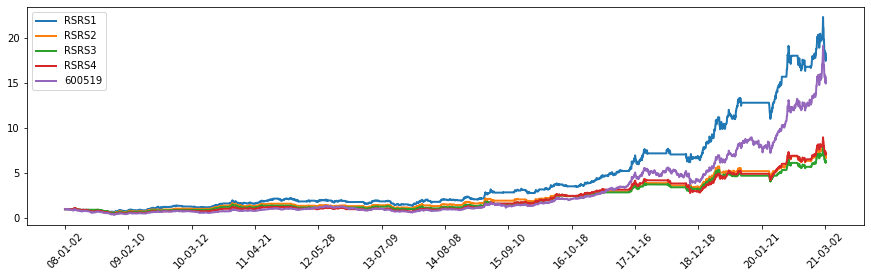

In [50]:
#xtick = np.arange(0,result.shape[0],int(result.shape[0] / 7))
#xticklabel = pd.Series(result.index.date[xtick])
xticklabel = result.index.get_level_values(level=0).to_series().apply(lambda x: x.strftime("%Y-%m-%d")[2:16])

plt.figure(figsize=(15,4))
fig = plt.axes()
plt.plot(np.arange(result.shape[0]), result.nav,label = 'RSRS1',linewidth = 2)
plt.plot(np.arange(result.shape[0]), result2.nav,label = 'RSRS2',linewidth = 2)
plt.plot(np.arange(result.shape[0]), result3.nav,label = 'RSRS3',linewidth = 2)
plt.plot(np.arange(result.shape[0]), result4.nav,label = 'RSRS4',linewidth = 2)
plt.plot(np.arange(result.shape[0]), indices_rsrs.close / indices_rsrs.close[0], label = codelist[0], linewidth = 2)
fig.set_xticks(range(0, len(xticklabel), 
                     round(len(xticklabel) / 12)))
fig.set_xticklabels(xticklabel[::round(len(xticklabel) / 12)],
                    rotation = 45)
plt.legend()
plt.show()